# Optimasi Model Machine Learning
- Untuk memperbaiki performa model machine learning dan menurunkan error, terdapat beberapa strategi yang dapat digunakan. Ada beberapa pendekatan yang umum diterapkan:
1. Pemilihan Fitur (Feature Selection)
2. Penskalaan Fitur (Feature Scaling)
3. Optimasi Model (Model Tuning/hyperparameter tuning)
4. Coba Algoritma Lain atau gunakan Ensemble Methods (Metode Ensemble)

# 3. MODEL TUNING/HYPERPARAMETER TUNING
- Hyperparameter tuning adalah proses memilih nilai-nilai optimal untuk hyperparameter dalam model machine learning untuk meningkatkan performa model tersebut.
- Hyperparameter merupakan parameter yang tidak dipelajari dari data selama pelatihan tetapi harus ditentukan sebelum pelatihan dimulai yang berguna untuk mengontrol proses pembelajaran model, seperti struktur model atau cara model dilatih.
- Hyperparameter untuk setiap algoritma akan berbeda-beda, karena setiap algoritma memiliki konsep dan tahapan penyelesaian yang berbeda.


# CONTOH HYPERPARAMETER 
- Classification and Regression Trees (CART) adalah salah satu algoritma didalam pohon keputusan yang digunakan untuk menyelesaikan masalah klasifikasi dan regresi, hyperparameter yang umum dituning adalah:
1. Max depth: Kedalaman maksimum pohon.
2. Min samples split: Jumlah sampel minimum untuk membuat cabang baru.
3. Min samples leaf: Jumlah sampel minimum untuk setiap daun.
4. Criterion: Fungsi untuk mengukur kualitas split (Gini, Entropy).

# CONTOH HYPERPARAMETER 
- Pada **Neural Network (jaringan saraf tiruan)** yang merupakan metode yang mencoba mengimplemetasikan sistem kerja dari otak manusia kedalam sebuah mesin, hyperparameter yang umum dituning adalah:
1. Learning rate: Kecepatan pembaruan bobot.
2. Number of layers: Jumlah lapisan dalam jaringan.
3. Number of neurons per layer: Jumlah neuron per lapisan.
4. Batch size: Ukuran data yang diproses dalam satu iterasi.
5. Activation function: ReLU, sigmoid, atau tanh.
6. Optimizer: Adam, SGD, atau RMSProp.
7. Epochs: Jumlah siklus pelatihan.

# CONTOH HYPERPARAMETER 
- Pada **K-Nearest Neighbors (KNN)** yang merupakan metode untuk menyelesaikan masalah dengan menggunakan jarak (misalnya, Euclidean, Manhattan) untuk menentukan tetangga terdekat, hyperparameter yang umum dituning adalah:
1. K (jumlah tetangga): Nilai K yang optimal untuk klasifikasi atau regresi.
2. Distance metric: Jenis metrik jarak (Euclidean, Manhattan, Minkowski, dll.).
3. Weighting: Penentuan bobot (uniform atau distance-based).

# Mengapa Hyperparameter Tuning Penting?
- **Hyperparameter tuning berfungsi untuk**
1. Kinerja model sangat dipengaruhi oleh hyperparameter.
2. Hyperparameter yang buruk dapat menyebabkan model underfitting atau overfitting.
3. Setiap dataset memiliki karakteristik unik, sehingga memerlukan kombinasi hyperparameter yang berbeda untuk hasil terbaik.
4. Dengan mengoptimalkan hyperparameter dapat meningkatkan akurasi, generalisasi, dan efisiensi model.

# Teknik Dalam Hyperparameter Tuning
### 1. Manual Search
### 2. Grid Search
### 3. Random Search
### 4. Bayesian Optimization
### 5. Automated Machine Learning (AutoML)


# CONTOH IMPLEMENTASI HYPERPARAMETER TUNING
## PREDIKSI LOYALITAS PELANGGAN DENGAN DECISION TREE (CART)

In [1]:
# import modul yang dibutuhkan
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# membaca dataset 
data=pd.read_csv('./simpandata/dataclean_Telcom.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   int64  
 6   gender_Male                              7032 non-null   int64  
 7   Partner_No                               7032 non-null   int64  
 8   Partner_Yes                              7032 non-null   int64  
 9   Dependents_No                            7032 non-null   int64  
 10  Dependents_Yes                           7032 no

In [2]:
# Memisahkan fitur (X/input) dan target (y/output):
X = data.drop('Churn', axis=1)
y = data['Churn']
#impor modul
from sklearn.model_selection import train_test_split
# membagi data menjadi data latih dan data tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
print('total data latih',X_train.shape)
print('total data uji',X_test.shape)

total data latih (4922, 45)
total data uji (2110, 45)


# CONTOH MODEL TANPA HYPERPARAMETER
###  Metode CART (Classification and Regression Tree)
- Python menggunakan library seperti scikit-learn melalui kelas DecisionTreeClassifier untuk klasifikasi dan DecisionTreeRegressor untuk regresi.
- Parameter default yang digunakan pada implementasi ini dirancang untuk memberikan hasil yang baik tanpa harus melakukan pengaturan awal.
- Adapun parameter default pada implementasi CART di scikit-learn:


- 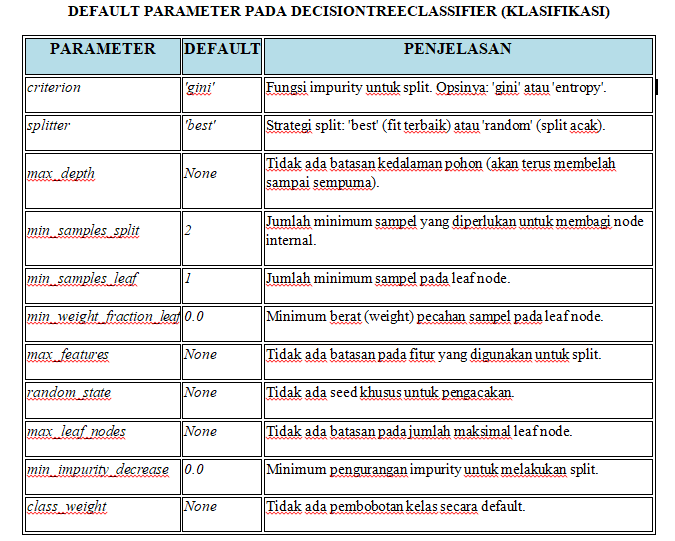

- 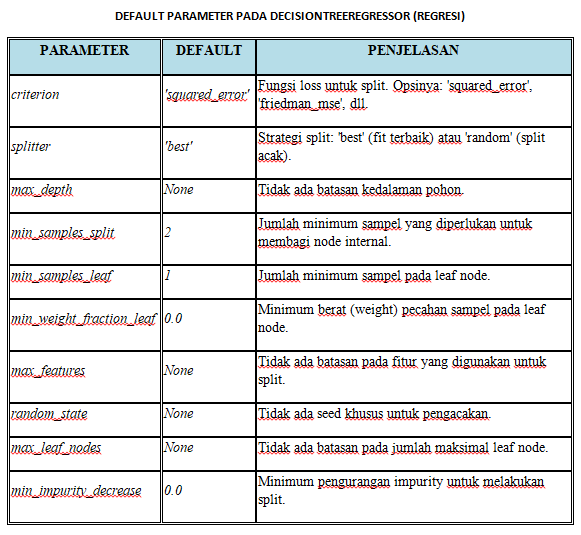

## Kapan Mengubah Default Parameter?
1. max_depth:
- Jika pohon terlalu dalam, perlu dibatasi untuk mencegah overfitting.
2. min_samples_split dan min_samples_leaf:
- Meningkatkan nilai ini membantu mencegah pohon menjadi terlalu kompleks dengan mengatur jumlah sampel minimum untuk node.
3. criterion:
- menggunakan 'entropy' pada masalah klasifikasi jika ingin mengukur impurity menggunakan informasi gain.
4. max_features:
- Berguna pada dataset dengan banyak fitur untuk mencegah overfitting.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support, classification_report

# membangun model decision tree dengan criterion "entropy"
dtree = DecisionTreeClassifier(criterion='entropy')

# melatih model decision tree pada train set
dtree.fit(X_train, y_train)

# Menampilkan semua parameter default
params = dtree.get_params()
print("Parameter Default Model Decision Tree:")
for param, value in params.items():
    print(f"{param}: {value}")

Parameter Default Model Decision Tree:
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: None
splitter: best


In [4]:
#menampilkan hasil prediksi (Uji Model)
y_pred = dtree.predict(X_test)
y_pred


# menghitung precision, recall, dan f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)

# menampilkan classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1553
           1       0.50      0.49      0.49       557

    accuracy                           0.73      2110
   macro avg       0.66      0.65      0.66      2110
weighted avg       0.73      0.73      0.73      2110



# CONTOH MODEL DENGAN HYPERPARAMETER

### 1. Manual Search
- Menentukan nilai-nilai hyperparameter secara manual berdasarkan pengalaman atau eksperimen.
- Pengetahuan domain (misalnya, untuk data dengan banyak fitur, Anda mungkin ingin mencoba pohon keputusan dengan kedalaman yang lebih dalam).
- Eksperimen bertahap, dengan mengubah satu hyperparameter pada satu waktu untuk memahami dampaknya terhadap kinerja model.
- Cocok untuk dataset kecil atau ketika jumlah hyperparameter yang dicoba terbatas.

### Kelebihan Manual Search
1. Kontrol Penuh
2. Efisiensi pada Ruang Pencarian Kecil
3. Penyesuaian Berdasarkan Intuisi

### Langkah-langkah Manual Search
#### 1. Identifikasi Hyperparameter Utama: Pilih hyperparameter yang kemungkinan besar memengaruhi performa model.
#### 2. Tentukan Rentang Nilai untuk Dicoba: Buat daftar nilai untuk setiap hyperparameter berdasarkan pengetahuan atau eksperimen awal.
#### 3. Lakukan Eksperimen Bertahap: Uji kombinasi hyperparameter satu per satu:
#### 4. Evaluasi Kinerja Model: Gunakan metrik evaluasi (misalnya akurasi, F1-score, atau RMSE) pada data validasi untuk mengevaluasi setiap kombinasi hyperparameter.
#### 5. Analisis Hasil dan Iterasi: Analisis hasil dari setiap kombinasi.

In [5]:
#pengaturan parameter decision tree secara manual (sederhana)
dtree1 = DecisionTreeClassifier(criterion='gini',
                               max_depth=10,
                               min_samples_split=12,
                               min_samples_leaf=5
                              )
# melatih model decision tree pada train set
dtree1.fit(X_train, y_train)

#menampilkan hasil prediksi (Uji Model)
y_pred1 = dtree1.predict(X_test)

# menghitung precision, recall, dan f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred1, average='weighted', zero_division=1)

# menampilkan classification report
print(classification_report(y_test, y_pred1, zero_division=1))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1553
           1       0.55      0.51      0.53       557

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.68      2110
weighted avg       0.75      0.76      0.76      2110



### Manual Search Secara Luas
- Pada contoh diatas penggunaan manual search masih sangat sederhana, karena belum mencakup proses pencarian kombinasi hyperparameter secara menyeluruh.
- Tidak ada eksperimen iteratif: Anda hanya mencoba satu set nilai hyperparameter tanpa membandingkannya dengan kombinasi lain.
- Tidak ada evaluasi performa model untuk berbagai kombinasi hyperparameter.
- Penggunaan Manual Search yang lebih luas, dilakukan dengan mencoba berbagai kombinasi nilai hyperparameter, sehingga dapat menemukan model dengan akurasi yang terbaik

In [6]:
from sklearn.metrics import accuracy_score
# Kombinasi hyperparameter
combinations = [
    {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3},
    {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = {}

# Coba setiap kombinasi
for params in combinations:
    model = DecisionTreeClassifier(**params)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred2)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_params = params
        best_y_pred = y_pred2

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print(classification_report(y_test, best_y_pred, zero_division=1))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3}
Best Accuracy: 0.7895734597156399
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1553
           1       0.61      0.55      0.58       557

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



## 2. Grid Search
- Grid Search adalah metode untuk menemukan kombinasi terbaik dari hyperparameter dalam sebuah algoritma machine learning atau deep learning dengan mencoba semua kombinasi yang mungkin dalam ruang pencarian yang telah ditentukan.
- Misalkan ada tiga hyperparameter:
1. criterion: ['gini', 'entropy'] → 2 pilihan
2. max_depth: [3, 5, 10] → 3 pilihan
3. min_samples_split: [2, 5, 10] → 3 pilihan
**Total kombinasi = 2×3×3=18.**

### Tahapan (Cara Kerja) Grid Search:
1. Tentukan ruang pencarian untuk hyperparameter, seperti:
- max_depth dengan nilai [3, 5].
- min_samples_split dengan nilai [2, 4].
2. Model akan diuji dengan setiap kombinasi hyperparameter dalam ruang pencarian.
3. Untuk setiap kombinasi, model dilatih dan dievaluasi menggunakan teknik validasi silang (cross-validation).
4. Kombinasi hyperparameter yang memberikan hasil terbaik dipilih.

### Tahapan (Cara Kerja) Grid Search:
1. Tentukan ruang pencarian untuk hyperparameter, seperti:
- max_depth dengan nilai [3, 5].
- min_samples_split dengan nilai [2, 4].
2. Model akan diuji dengan setiap kombinasi hyperparameter dalam ruang pencarian.
3. Untuk setiap kombinasi, model dilatih dan dievaluasi menggunakan teknik validasi silang (cross-validation).
4. Kombinasi hyperparameter yang memberikan hasil terbaik dipilih.

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split


# Definsikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],       
    'max_depth': [None, 3, 5, 10],          
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],          
}

# membangun model
dtree2 = DecisionTreeClassifier(random_state=42)

# mengukur Performa Grid Search
grid_search = GridSearchCV(estimator=dtree2, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# mencari kombinasi Parameters terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# menampilkan hasil
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7952075853245842

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1553
           1       0.61      0.51      0.56       557

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



## NOTED
### - Data dibagi menjadi 5 bagian (folds) untuk melakukan cross-validation pada data training(4922/5= 984 data)
### -Terdapat 72 ruang pencarian dari kombinasi parameter yang telah di tentukan
### -Total pelatihan sebanyak 360 (72 x5=360)
### - Parameter terbaik dengan menggunakan 
- 'criterion': 'entropy'
- 'max_depth': 5
- 'min_samples_leaf': 4
- 'min_samples_split': 2 
### Dengan tingkat akurasi 79,5 %


## 3. Random Search
- Random Search adalah salah satu metode yang digunakan untuk mencari kombinasi terbaik dari hyperparameter dengan cara memilih nilai hyperparameter secara acak dari ruang pencarian (search space).
- Tidak seperti Grid Search, yang mencoba semua kemungkinan kombinasi, Random Search hanya mengevaluasi sejumlah kombinasi yang dipilih secara acak.
- Metode ini lebih efisien dibandingkan dengan Grid Search, terutama ketika:
1. Ruang pencarian sangat besar.
2. Beberapa hyperparameter memiliki pengaruh signifikan, dibandingkan yang lainnya.

### Tahapan (CaraKerja) Random Search
1. Definisikan Search Space: Tentukan hyperparameter yang ingin dioptimalkan dan rentang nilainya.
2. Sampling Acak: Pilih kombinasi nilai hyperparameter secara acak dari ruang pencarian.
3. Evaluasi Model: Untuk setiap kombinasi, latih model pada data training dan evaluasi performanya pada data validasi.
4. Pilih Hyperparameter Terbaik:Pilih kombinasi hyperparameter yang memberikan performa terbaik.

### Grid Search VS Random Search
- 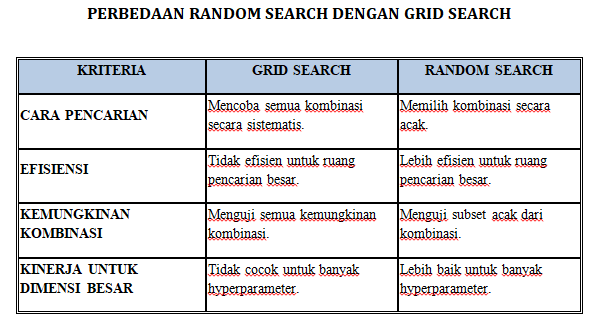

In [13]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# definisikan parameter (480 space search)
param_dist = {
    'criterion': ['gini', 'entropy'],             
    'max_depth': [None, 3, 5, 10, 15],            
    'min_samples_split': [2, 5, 10, 20],          
    'min_samples_leaf': [1, 2, 4, 6],             
    'max_features': [None, 'sqrt', 'log2'],       
}

# membangun model DecisionTreeClassifier
dtree3 = DecisionTreeClassifier(random_state=42)

# mengukur Performa Random Search
random_search = RandomizedSearchCV(
    estimator=dtree3, 
    param_distributions=param_dist,
    # random parameter (20-30% dari ruang pencarian)
    n_iter=50,                 
    scoring='accuracy', 
    # cross-validation
    cv=5,                      
    random_state=42, 
    verbose=1, 
    n_jobs=-1                  
)
random_search.fit(X_train, y_train)

# menampilkan kombinasi Parameter terbaik
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluasi model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'entropy'}
Best Cross-Validation Accuracy: 0.7952075853245842

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1553
           1       0.61      0.51      0.56       557

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



## NOTED
### - Data dibagi menjadi 5 bagian (folds) untuk melakukan cross-validation pada data training(4922/5= 984 data)
### -Terdapat 480 ruang pencarian dari kombinasi parameter yang telah di tentukan, diambil 50 secara Random
### -Total pelatihan sebanyak 250 (50 x5=250)
### - Parameter terbaik dengan menggunakan 
- 'criterion': 'entropy'
- 'max_depth': 5
- 'min_samples_leaf': 4
- 'min_samples_split': 10 
### Dengan tingkat akurasi 79,5 %


## 4. Bayesian Optimization & BayesSearchCV
- Bayesian Optimization adalah metode optimasi yang digunakan untuk mencari nilai optimal dari suatu fungsi yang mahal untuk dihitung atau membutuhkan banyak waktu untuk dievaluasi. Biasanya digunakan pada masalah yang melibatkan pencarian parameter hyperparameter untuk model machine learning.
- Bayesian Optimization merupakan metode optimasi probabilistik yang mencoba untuk meminimalkan atau memaksimalkan suatu fungsi dengan meminimalkan jumlah evaluasi yang diperlukan untuk menemukan solusi optimal.
- Metode ini menggunakan model probabilistik untuk memodelkan ketidakpastian dalam evaluasi fungsi dan memilih evaluasi berikutnya yang paling informatif.
- Bayesian Optimization secara khusus digunakan untuk mengoptimasi fungsi yang tidak diketahui secara eksplisit dan hanya dapat dievaluasi melalui simulasi atau pengujian.

### Komponen-Komponen dalam Bayesian Optimization
1. Surrogate Model:
- Pada Bayesian Optimization, kita menggunakan Gaussian Process (GP) sebagai model probabilistik yang mengestimasi hubungan antara input dan output dari fungsi objektif.
- Gaussian Process memberikan distribusi probabilistik untuk prediksi, yang memungkinkan kita untuk memilih titik berikutnya yang akan dievaluasi berdasarkan ketidakpastian.
2. Acquisition Function:
- Acquisition function adalah strategi yang digunakan untuk memilih titik parameter mana yang akan dievaluasi berikutnya. Tujuannya adalah memilih titik yang dapat memberikan informasi paling banyak untuk mengurangi ketidakpastian.
- Beberapa jenis acquisition function yang populer adalah:
- **Probability of Improvement (PI)**: Memilih titik yang memiliki peluang terbaik untuk meningkatkan hasil.
- **Expected Improvement (EI)**: Menghitung perbedaan yang diharapkan antara hasil terbaik yang pernah ditemukan dan hasil potensial.
- **Upper Confidence Bound (UCB)**: Memilih titik berdasarkan keseimbangan antara prediksi dan ketidakpastian.
3. Iterative Process:
- Proses ini dilakukan secara iteratif. Pada setiap iterasi, model probabilistik (Gaussian Process) diperbarui berdasarkan evaluasi sebelumnya, dan acquisition function digunakan untuk memilih titik parameter yang akan dievaluasi selanjutnya.

## Kapan Menggunakan Bayesian Optimization?
1. Masalah fungsi objektif yang mahal untuk dihitung: Ketika evaluasi suatu fungsi membutuhkan waktu yang lama (misalnya, training model machine learning dengan banyak hyperparameter), Bayesian Optimization dapat mengurangi jumlah evaluasi yang dibutuhkan untuk menemukan solusi optimal.
2. Masalah yang tidak memiliki bentuk analitik: Ketika fungsi objektif tidak dapat diekspresikan secara analitik, Bayesian Optimization dapat digunakan untuk memperkirakan nilai terbaik berdasarkan evaluasi yang ada.
3. Optimasi Hyperparameter: Salah satu aplikasi utama dari Bayesian Optimization adalah untuk mencari kombinasi hyperparameter terbaik dalam model machine learning. Proses ini lebih efisien daripada metode pencarian grid atau random search..

## Tahapan Bayesian Optimization
1. Definisikan Fungsi Objektif
 - Tentukan metrik yang akan dioptimalkan.
 - Contoh: Akurasi model, Root Mean Squared Error (RMSE), atau waktu komputasi.
2. Tetapkan Ruang Pencarian
3. Evaluasi Awal
 - Pilih beberapa kombinasi parameter awal untuk mengevaluasi fungsi objektif.
 - Gunakan random sampling atau desain eksperimental seperti Latin Hypercube Sampling.
4. Bangun Surrogate Model
 - Bangun model probabilistik (surrogate model), seperti Gaussian Process, untuk memprediksi fungsi objektif.
5. Gunakan Fungsi Akuisisi
 - Tentukan fungsi akuisisi seperti Expected Improvement (EI) atau Probability of Improvement (PI) untuk memilih parameter berikutnya.
6. Evaluasi Parameter Baru
 - Evaluasi parameter yang dipilih oleh fungsi akuisisi pada fungsi objektif.
 - Perbarui dataset evaluasi dengan hasil baru.
7. Iterasi
 - Ulangi proses hingga kriteria henti terpenuhi.
8. Pilih Hasil Terbaik
 - Parameter dengan hasil fungsi objektif terbaik menjadi solusi akhir.

In [11]:
# install library bayes optimation
# pip install scikit-optimize

In [3]:
from sklearn.model_selection import cross_val_score, train_test_split
from skopt import BayesSearchCV


#Definisikan ruang pencarian
search_space = {
    'criterion': ['gini', 'entropy'],                   
    'max_depth': [3, 5, 10, 15, None],                  
    'min_samples_split': [2, 5, 10, 20],                
    'min_samples_leaf': [1, 2, 4, 6],                   
    'max_features': ['sqrt', 'log2', None],             
}

# membangun model
dtree = DecisionTreeClassifier(random_state=42)

# 5. mengukur Performa Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=dtree, 
    search_spaces=search_space, 
    n_iter=50,                      
    scoring='accuracy', 
    cv=5,                           
    random_state=42, 
    verbose=1, 
    n_jobs=-1                       
)
bayes_search.fit(X_train, y_train)

# 6. Parameters terbaik
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validation Accuracy:", bayes_search.best_score_)

# 7. Evaluasi model
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))


NameError: name 'DecisionTreeClassifier' is not defined

## 5. Automated Machine Learning (AutoML)
- Automated Machine Learning (AutoML) adalah pendekatan untuk mengotomatisasi proses pengembangan model pembelajaran mesin (machine learning).
- AutoML bertujuan untuk menyederhanakan pipeline machine learning dengan menangani tugas-tugas seperti pemilihan algoritma, preprocessing data, hyperparameter tuning, dan bahkan pemilihan fitur tanpa memerlukan intervensi manual yang signifikan.
- Tools seperti TPOT, AutoKeras, Google AutoML, atau H2O.ai dapat melakukan hyperparameter tuning secara otomatis menggunakan pendekatan canggih seperti Bayesian Optimization atau Reinforcement Learning.

Manfaat AutoML:
- Efisiensi Waktu: Mengurangi waktu yang dihabiskan untuk eksperimen manual.
- Aksesibilitas: Membantu non-ekspert untuk membangun model machine learning.
- Kinerja Optimal: Menggunakan pendekatan canggih seperti Bayesian Optimization untuk mencari parameter terbaik.

Komponen Utama AutoML
Data Preprocessing:

Menangani nilai hilang (missing values).
Normalisasi dan standardisasi data.
Pemilihan dan ekstraksi fitur secara otomatis.
Pemilihan Model:

AutoML mencoba berbagai algoritma (seperti Decision Tree, Random Forest, XGBoost, dll.) untuk menentukan yang terbaik berdasarkan data.
Hyperparameter Tuning:

Proses pencarian nilai terbaik untuk parameter model seperti learning rate, jumlah pohon dalam Random Forest, dll.
Pendekatan populer meliputi Grid Search, Random Search, Bayesian Optimization, dan Reinforcement Learning.
Evaluasi Model:

AutoML mengevaluasi model menggunakan cross-validation atau metrik evaluasi lainnya seperti akurasi, f1-score, dll.
Pipeline Otomatis:

Membangun pipeline otomatis dari preprocessing hingga evaluasi model.

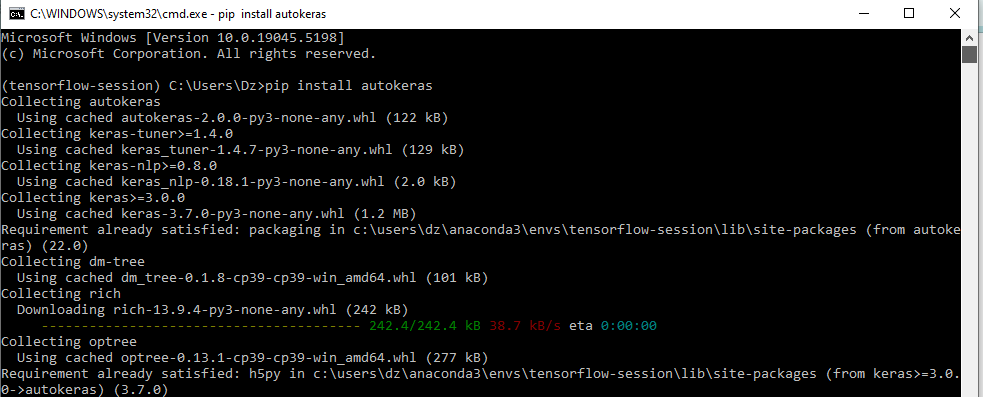

In [3]:
pip install autokeras

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
from autokeras import StructuredDataClassifier

# Load dataset
import pandas as pd
X = pd.read_csv('./simpandata/dataclean_Telcom.csv')
y = X.pop('target')

# Define and train the model
model = StructuredDataClassifier(max_trials=10)  # AutoML with 10 trials
model.fit(X, y)

ModuleNotFoundError: No module named 'autokeras'

TPOT (Tree-based Pipeline Optimization Tool) adalah pustaka open-source berbasis Python yang dirancang untuk mengotomatiskan proses pengembangan model machine learning. TPOT menggunakan pendekatan genetic programming untuk mengoptimalkan pipeline pembelajaran mesin, termasuk preprocessing, seleksi fitur, pemilihan model, dan tuning hyperparameter.

2. Fitur Utama TPOT
Otomatisasi Pipeline: Menggabungkan preprocessing data, pemilihan model, dan tuning hyperparameter.
Berbasis Genetic Programming: Menggunakan algoritma evolusioner untuk menemukan pipeline terbaik.
Kompatibilitas dengan scikit-learn: TPOT membangun pipeline dengan model dan transformasi dari pustaka scikit-learn.
Kemudahan Penggunaan: TPOT memerlukan sedikit usaha manual, menjadikannya alat yang efisien untuk eksperimen.

In [4]:
## Auto Search

from tpot import TPOTClassifier


# Inisialisasi TPOT
tpot = TPOTClassifier(
    generations=10,           
    population_size=20,       
    verbosity=2,              
    random_state=42,          
    n_jobs=-1                 
)

# pencarian parameter terbaik
tpot.fit(X_train, y_train)

# Evaluasi model terbaik
y_pred = tpot.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Export pipeline terbaik
tpot.export('best_pipeline.py')  # Save model terbaik


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8073979612892576

Generation 2 - Current best internal CV score: 0.8073979612892576

Generation 3 - Current best internal CV score: 0.8098369856795016

Generation 4 - Current best internal CV score: 0.8098369856795016

Generation 5 - Current best internal CV score: 0.8098369856795016

Generation 6 - Current best internal CV score: 0.8098369856795016

Generation 7 - Current best internal CV score: 0.8098369856795016

Generation 8 - Current best internal CV score: 0.8098369856795016

Generation 9 - Current best internal CV score: 0.8098369856795016

Generation 10 - Current best internal CV score: 0.8098369856795016

Best pipeline: ExtraTreesClassifier(ZeroCount(input_matrix), bootstrap=False, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=18, min_samples_split=9, n_estimators=100)

Classification Report:


NameError: name 'classification_report' is not defined

# NOTED
- HASIL PREDIKSI 
1. **TANPA HYPERPARAMETER** MENCAPAI NILAI AKURASI 73%
2. **HYPERPARAMETER (MANUAL SEARCH SEDERHANA)** MENCAPAI NILAI AKURASI 76%
3. **HYPERPARAMETER (MANUAL SEARCH)** MENCAPAI NILAI AKURASI 78,9%
4. **HYPERPARAMETER (GRID SEARCH)** MENCAPAI NILAI AKURASI 79,5%
5. **HPERPARAMETER (RANDOM SEARCH)** MENCAPAI NILAI AKURASI 79,3%
3. **HYPERPARAMETER (BAYES SEARCH)** MENCAPAI NILAI AKURASI 79,5%
3. **HYPERPARAMETER (AUTO SEARCH)** MENCAPAI NILAI AKURASI 80,9%